# Author : Rahul Singh


## DATASET : 311_Customer_Service_Requests_Analysis


# @Simplilearn

# --------------------------------------------------------------------------------------------------------------

# <u>Solution :

# 1. Importing the Dataset and doing Data Preprocessing on the dataset

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
import datetime

from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [2]:
# reading the dataset
# Note: Our Dataset is very large so setting low_memory to false
dataset = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', low_memory = False)

In [3]:
# View the top 5 elements of the dataset
dataset.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
# shape of the dataset
dataset.shape

(364558, 53)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      364558 non-null  int64  
 1   Created Date                    364558 non-null  object 
 2   Closed Date                     362177 non-null  object 
 3   Agency                          364558 non-null  object 
 4   Agency Name                     364558 non-null  object 
 5   Complaint Type                  364558 non-null  object 
 6   Descriptor                      358057 non-null  object 
 7   Location Type                   364425 non-null  object 
 8   Incident Zip                    361560 non-null  float64
 9   Incident Address                312859 non-null  object 
 10  Street Name                     312859 non-null  object 
 11  Cross Street 1                  307370 non-null  object 
 12  Cross Street 2  

#### There are a lot of columns in our dataset but I don't need all of them. So I will drop the columns that have a very large number of null values in it. Also I don't need the unnecessary columns, so I will drop them.

In [6]:
# viewing the columns
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

- Columns with most of its values as null are dropped
- Agency and Agency Name are more or less same, so I am dropping Agency Name
- Dropping other unnecessary columns like Location, Incident Adrress, Street Name, X Coordinate (State Plane), Y Coordinate (State Plane)  as we are already considering LATITUDE and LONGITUDE
- Dropping other unnecessary columns

In [7]:
# dropping the irrelevant columns
drop_columns = ['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name',
'School Number','School Region','School Code','School Phone Number','School Address','School City',
'School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type',
'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date','Community Board','Facility Type',
'Location']

dataset = dataset.drop(drop_columns, axis=1)

In [8]:
# checking the shape of our dataset
dataset.shape

(364558, 14)

#### So we are upto 14 columns from 53...That's a lot of reduction !

- ### Now check for null values, data type of the columns etc.

In [9]:
# checking the info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              364558 non-null  int64  
 1   Created Date            364558 non-null  object 
 2   Closed Date             362177 non-null  object 
 3   Agency                  364558 non-null  object 
 4   Complaint Type          364558 non-null  object 
 5   Descriptor              358057 non-null  object 
 6   Location Type           364425 non-null  object 
 7   Incident Zip            361560 non-null  float64
 8   City                    361561 non-null  object 
 9   Status                  364558 non-null  object 
 10  Resolution Description  364558 non-null  object 
 11  Borough                 364558 non-null  object 
 12  Latitude                360528 non-null  float64
 13  Longitude               360528 non-null  float64
dtypes: float64(3), int64

In [10]:
# checking the number of null values in the columns
dataset.isnull().sum()

Unique Key                   0
Created Date                 0
Closed Date               2381
Agency                       0
Complaint Type               0
Descriptor                6501
Location Type              133
Incident Zip              2998
City                      2997
Status                       0
Resolution Description       0
Borough                      0
Latitude                  4030
Longitude                 4030
dtype: int64

In [11]:
# choosing the closed cases only to eliminate the null values

dataset = dataset[dataset['Status'] == 'Closed']

In [12]:
dataset.isnull().sum()

Unique Key                   0
Created Date                 0
Closed Date                  0
Agency                       0
Complaint Type               0
Descriptor                6490
Location Type               67
Incident Zip               675
City                       674
Status                       0
Resolution Description       0
Borough                      0
Latitude                  1707
Longitude                 1707
dtype: int64

In [13]:
# since all the cases are of closed cases we can now drop the column Status as every value of its data are same
dataset = dataset.drop(['Status'], axis = 1)

In [14]:
dataset.shape

(362114, 13)

In [15]:
# out of the remaining columns only Descriptor, Latitude and Longitude has over 1k null values
dataset = dataset[(dataset['Descriptor'].notnull()) & (dataset['Latitude'].notnull()) &(dataset['Longitude'].notnull())]

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353988 entries, 0 to 364557
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              353988 non-null  int64  
 1   Created Date            353988 non-null  object 
 2   Closed Date             353988 non-null  object 
 3   Agency                  353988 non-null  object 
 4   Complaint Type          353988 non-null  object 
 5   Descriptor              353988 non-null  object 
 6   Location Type           353933 non-null  object 
 7   Incident Zip            353948 non-null  float64
 8   City                    353948 non-null  object 
 9   Resolution Description  353988 non-null  object 
 10  Borough                 353988 non-null  object 
 11  Latitude                353988 non-null  float64
 12  Longitude               353988 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 37.8+ MB


In [16]:
# rechecking remaining null values
dataset.isnull().sum()

Unique Key                 0
Created Date               0
Closed Date                0
Agency                     0
Complaint Type             0
Descriptor                 0
Location Type             55
Incident Zip              40
City                      40
Resolution Description     0
Borough                    0
Latitude                   0
Longitude                  0
dtype: int64

In [17]:
# still there are few null values in our dataset. we will remove them
dataset = dataset[(dataset['Location Type'].notnull()) & (dataset['Incident Zip'].notnull()) &(dataset['City'].notnull())]

# rechecking for null values
dataset.isnull().sum()

Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
dtype: int64

-- So all Null values are removed from our dataset

In [18]:
# checking the shape our datset
dataset.shape

(353891, 13)

# 2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)

In [19]:
# converting 'Created Date' and 'Closed Date' to datetime datatype

cols = ['Created Date', 'Closed Date']
for col in cols:
    dataset[col] = pd.to_datetime(dataset[col],infer_datetime_format=True)
    
# creating a new column Request_Closing_Time
dataset['Request_Closing_Time'] = dataset[cols[1]] - dataset[cols[0]]

# viewing the info to see the data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353891 entries, 0 to 364557
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Unique Key              353891 non-null  int64          
 1   Created Date            353891 non-null  datetime64[ns] 
 2   Closed Date             353891 non-null  datetime64[ns] 
 3   Agency                  353891 non-null  object         
 4   Complaint Type          353891 non-null  object         
 5   Descriptor              353891 non-null  object         
 6   Location Type           353891 non-null  object         
 7   Incident Zip            353891 non-null  float64        
 8   City                    353891 non-null  object         
 9   Resolution Description  353891 non-null  object         
 10  Borough                 353891 non-null  object         
 11  Latitude                353891 non-null  float64        
 12  Longitude       

# 3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

In [20]:
# applying describe on the dataset
dataset.describe()

,Unique Key,Incident Zip,Latitude,Longitude,Request_Closing_Time
count,3.538910e+05,353891.000000,353891.000000,353891.000000,353891
mean,3.106374e+07,10866.932143,40.724788,-73.924394,0 days 04:11:24.057729639
std,7.358240e+05,575.363214,0.082264,0.079395,0 days 05:50:01.901604780
min,2.960737e+07,83.000000,40.499040,-74.254937,0 days 00:01:01
25%,3.049097e+07,10451.000000,40.667971,-73.971468,0 days 01:15:31
50%,3.108240e+07,11209.000000,40.717707,-73.929810,0 days 02:40:05
75%,3.167769e+07,11238.000000,40.778624,-73.873072,0 days 05:13:55
max,3.231065e+07,11697.000000,40.912869,-73.700715,24 days 16:52:22


In [21]:
# viewing the columns
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time'],
      dtype='object')

### We will analyse Agency, Complaint Type, Descriptor, Location Type, City, Borough 

In [22]:
# All the complaints are under the same agency
dataset['Agency'].value_counts()

NYPD    353891
Name: Agency, dtype: int64

In [23]:
# complaint types
dataset['Complaint Type'].value_counts()

Blocked Driveway            100455
Illegal Parking              91057
Noise - Street/Sidewalk      50791
Noise - Commercial           43623
Derelict Vehicle             21419
Noise - Vehicle              19122
Animal Abuse                 10500
Traffic                       5161
Vending                       4162
Noise - Park                  3994
Drinking                      1399
Noise - House of Worship      1059
Posting Advertisement          678
Disorderly Youth               314
Graffiti                       157
Name: Complaint Type, dtype: int64

<Axes: title={'center': 'Complaint Types'}, ylabel='Count'>

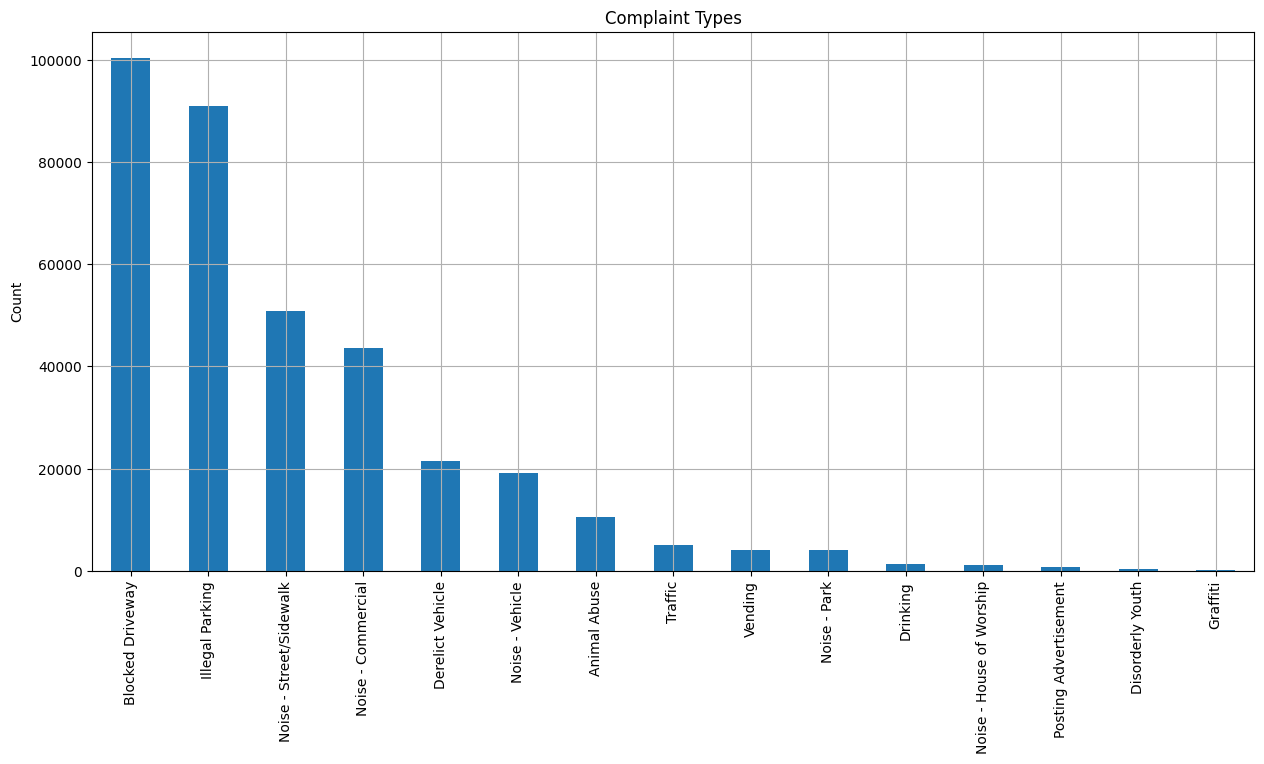

In [24]:
# plotting the complaint types
dataset['Complaint Type'].value_counts().plot(kind = 'bar', figsize=(15, 7), title='Complaint Types', ylabel='Count', grid=True)

- so <b>Blocked Driveway</b> is the Maximum Complaint type followed by Illegal Parking, Noise-Street/Sidewalk, Noise-Commercial

In [25]:
# Descriptors
dataset['Descriptor'].value_counts()

No Access                         75590
Loud Music/Party                  68668
Posted Parking Sign Violation     26817
Partial Access                    24865
Loud Talking                      23458
With License Plate                21419
Blocked Hydrant                   19717
Commercial Overnight Parking      14629
Blocked Sidewalk                  13615
Car/Truck Music                   11777
Double Parked Blocking Traffic     6952
Engine Idling                      5261
Neglected                          5114
Double Parked Blocking Vehicle     5082
Banging/Pounding                   4876
Car/Truck Horn                     4436
Congestion/Gridlock                3208
Other (complaint details)          2480
In Prohibited Area                 2197
Overnight Commercial Storage       2090
Unlicensed                         1965
Unauthorized Bus Layover           1579
Truck Route Violation              1120
Tortured                           1036
In Public                           962


<Axes: title={'center': 'Top 10 Descriptors'}>

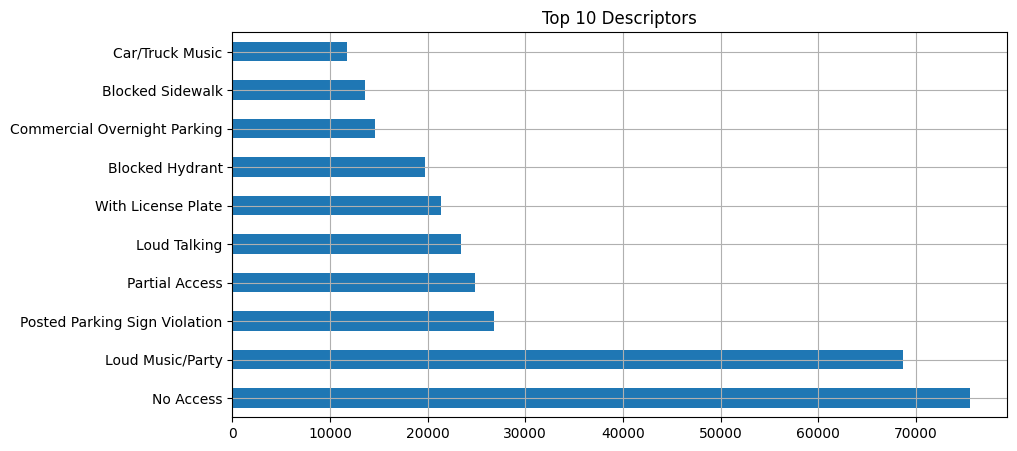

In [26]:
# plotting top 10 Descriptors
dataset['Descriptor'].value_counts().head(10).plot(kind='barh', grid=True, figsize=(10,5), title='Top 10 Descriptors')

- So <b>Loud Music/Party</b> is the <u>maximum</u> descriptor for the complaints followed by No Access, Posted Parking Sign Violation and Loud Taking.

In [27]:
# Top 10 Location Type
dataset['Location Type'].value_counts().head(10)

Street/Sidewalk               294128
Store/Commercial               24148
Club/Bar/Restaurant            21306
Residential Building/House      7466
Park/Playground                 4336
House of Worship                1059
Residential Building             529
House and Store                  245
Highway                          242
Parking Lot                      166
Name: Location Type, dtype: int64

<Axes: title={'center': 'Top 10 Location Type'}>

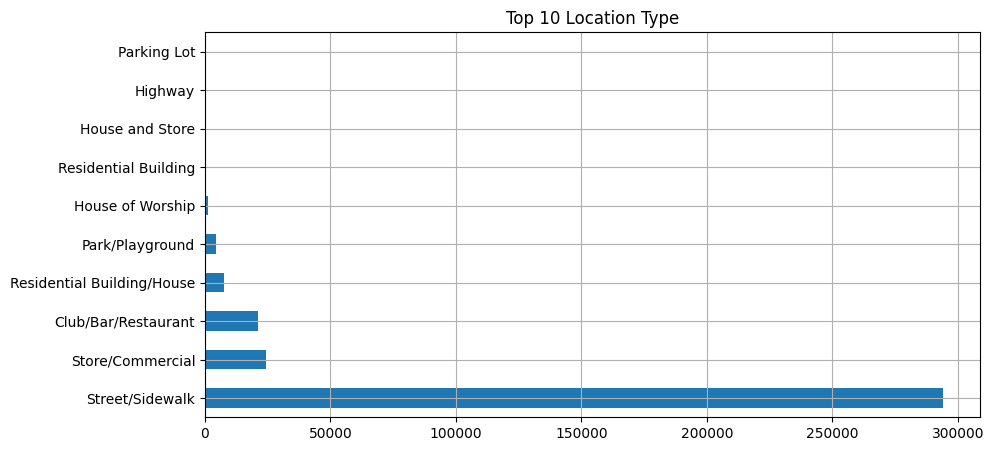

In [28]:
# plotting Top 10 Location Type
dataset['Location Type'].value_counts().head(10).plot(kind='barh', grid=True, figsize=(10, 5), title='Top 10 Location Type')

- So we see that the Location Type of <b>Street/Sidewalk</b> is a lot more than any other members of its category

In [29]:
# City
dataset['City'].value_counts().head(10)

BROOKLYN         117268
NEW YORK          72847
BRONX             48640
STATEN ISLAND     15191
JAMAICA            8772
ASTORIA            7910
FLUSHING           7431
RIDGEWOOD          6348
CORONA             5346
WOODSIDE           4300
Name: City, dtype: int64

Text(0.5, 0, 'Complaint Counts')

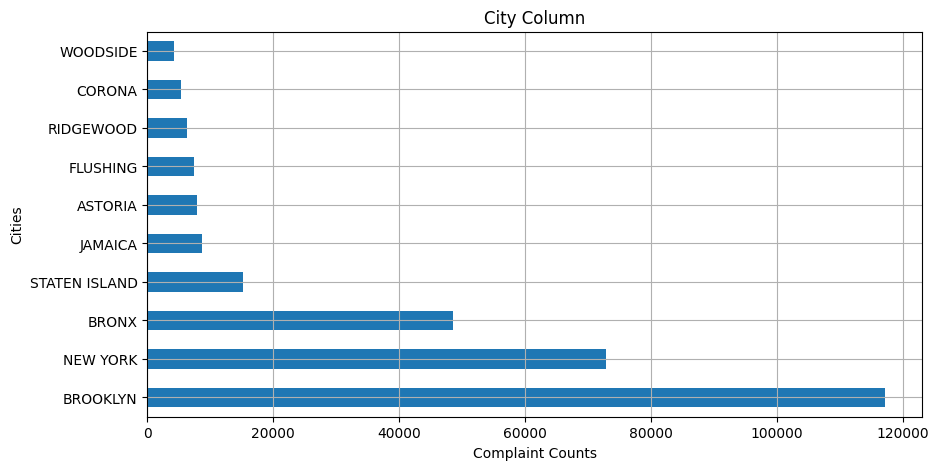

In [30]:
# plotting the cities
dataset['City'].value_counts().head(10).plot(kind='barh', grid=True, figsize=(10, 5), title='City Column', ylabel='Cities')
plt.xlabel('Complaint Counts')

- So most complaints are from <b>BROOKLYN</b> followed New York, Bronx, Staten Island in City wise

Text(0.5, 0, 'Complaint Counts')

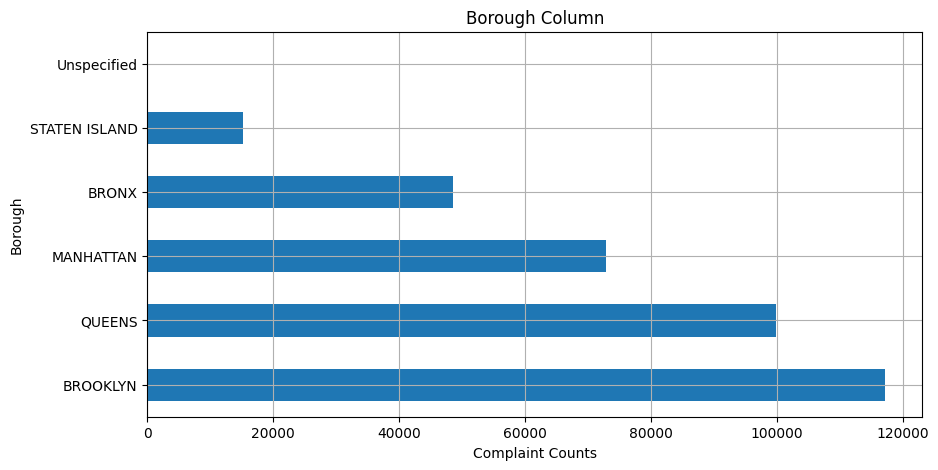

In [31]:
# Borough
dataset['Borough'].value_counts().head(10).plot(kind='barh', grid=True, figsize=(10, 5), title='Borough Column', ylabel='Borough')
plt.xlabel('Complaint Counts')

- So most complaints are from <b>BROOKLYN</b> followed Queens, Manhattan, Bronx and Staten Island in Borough wise

### Till now we only analyse one column. Lets analyse Borough and Complaint Types

- Borough per Complaint Type

In [32]:
# Top Complaints
top_6_complaints = dataset['Complaint Type'].value_counts()[:6].keys()
top_6_complaints

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle', 'Noise - Vehicle'],
      dtype='object')

In [33]:
# Borough per Complaints
borough_complaints = dataset.groupby(['Borough', 'Complaint Type']).size().unstack()
borough_complaints = borough_complaints[top_6_complaints]
borough_complaints

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Street/Sidewalk,Noise - Commercial,Derelict Vehicle,Noise - Vehicle
Borough,,,,,,
BRONX,17048.0,9852.0,9116.0,2941.0,2398.0,3544.0
BROOKLYN,36414.0,33446.0,13942.0,13847.0,6243.0,5932.0
MANHATTAN,2686.0,14372.0,22186.0,18666.0,687.0,6178.0
QUEENS,41463.0,27168.0,4663.0,7386.0,9911.0,3045.0
STATEN ISLAND,2844.0,6218.0,884.0,783.0,2180.0,423.0
Unspecified,NaN,1.0,NaN,NaN,NaN,NaN


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8736\338312555.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (label,col) in enumerate(borough_complaints.iteritems()):


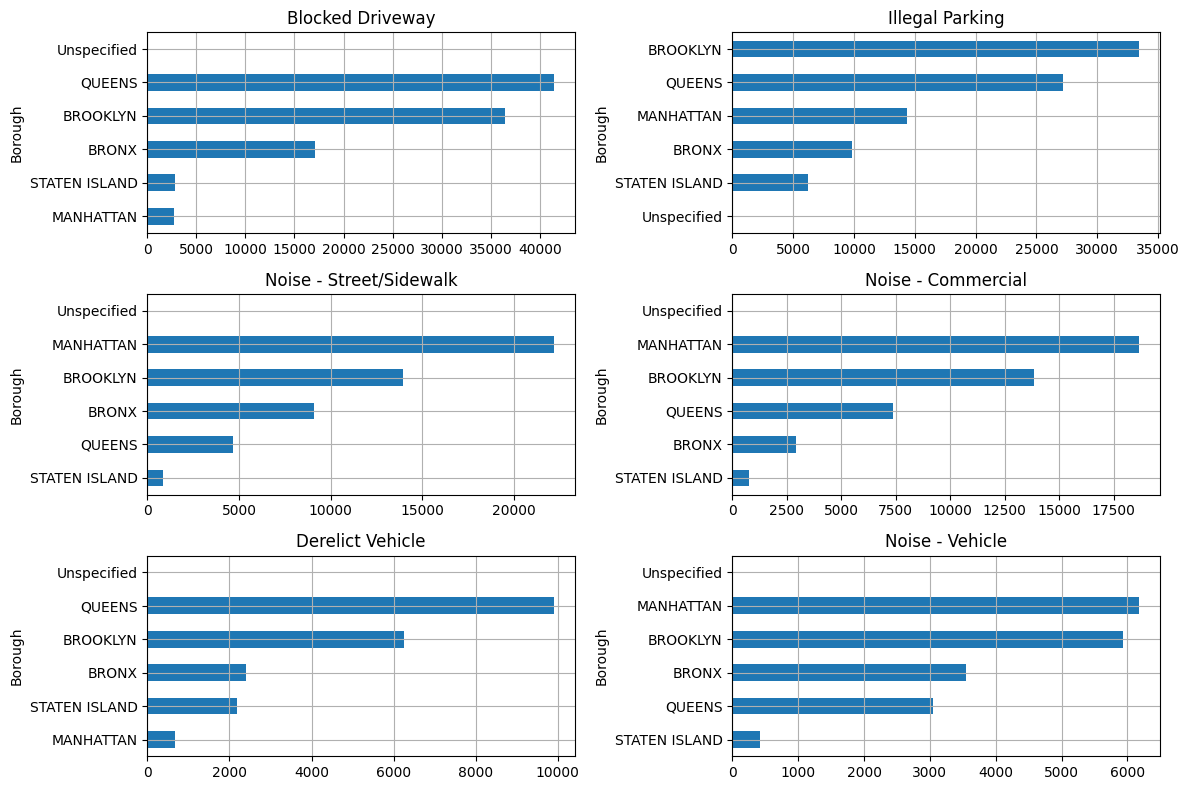

In [34]:
# Plotting Borough per Complaint Type 
col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,8))

for i, (label,col) in enumerate(borough_complaints.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax, grid=True)
    ax.set_title(label)
    
plt.tight_layout()

<u>ANALYSIS:</u>
    
    - Blocked Driveway is maximum in QUEENS
    - Illegal Parking is maximum in BROOKLYN
    - Noise - Street/Sidewalk is maximum in MANHATTAN
    - Noise - Commercial is maximum in MANHATTAN
    - Derelict Vehicle is maximum in QUEENS
    - Noise - Vehicle is maximum in QUEENS


- Similarly for Complaints per Borough

In [35]:
# similarly for Complaints per Borough
top_borough = dataset['Borough'].value_counts().keys()

complaint_per_borough = dataset.groupby(['Complaint Type', 'Borough']).size().unstack()
complaint_per_borough = complaint_per_borough[top_borough]
complaint_per_borough

Borough,BROOKLYN,QUEENS,MANHATTAN,BRONX,STATEN ISLAND,Unspecified
Complaint Type,,,,,,
Animal Abuse,3185.0,2637.0,1926.0,1966.0,786.0,NaN
Blocked Driveway,36414.0,41463.0,2686.0,17048.0,2844.0,NaN
Derelict Vehicle,6243.0,9911.0,687.0,2398.0,2180.0,NaN
Disorderly Youth,79.0,64.0,80.0,66.0,25.0,NaN
Drinking,291.0,395.0,320.0,205.0,188.0,NaN
Graffiti,60.0,51.0,25.0,15.0,6.0,NaN
Illegal Parking,33446.0,27168.0,14372.0,9852.0,6218.0,1.0
Noise - Commercial,13847.0,7386.0,18666.0,2941.0,783.0,NaN
Noise - House of Worship,387.0,347.0,217.0,90.0,18.0,NaN


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8736\3620830784.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (label,col) in enumerate(complaint_per_borough.iteritems()):


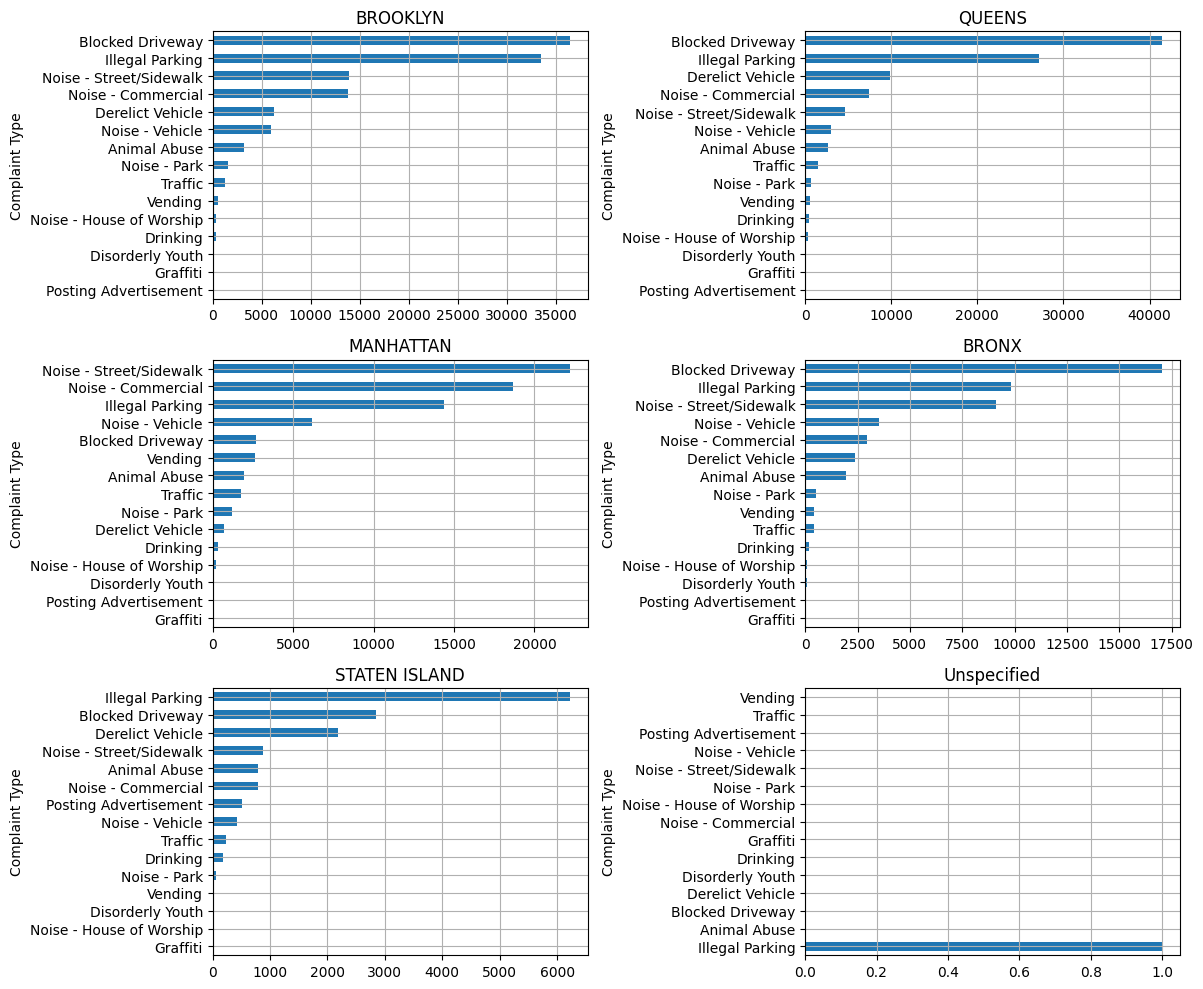

In [36]:
# Plotting Complaints per Borough
col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,10))

for i, (label,col) in enumerate(complaint_per_borough.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax, grid=True)
    ax.set_title(label)
    
plt.tight_layout()

<u>ANALYSIS:</u>

    - BROOKLYN, QUEENS and BRONX has most complaints of Blocked Driveway.
    - MANHATTAN has most complaints of Noise - Street/Sidewalk.
    - STATEN ISLAND has most complaints of Illegal Parking.

# 4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

- Our data in Request_Closing_Time has format of days-hour-minute-seconds. Since calculating or operating canbe a tedious process, to make our work easier we first will convert our Request_Closing_Time from days to number of hours. This will make the data calculation or operation easier.
<br><br>
- Since, converting 2:30 hours to timedelta64[h] will give 2 hours, hence we will add 1 and will say that this particular request was closed within 3 hours.
- Then we will find out the mean and standard distribution of the data.

In [37]:
# Creating a column Request_Closing_Time_in_Hours for time in Hours
# and we will say the said complaint has been closed under x hours
dataset['Request_Closing_Time_in_Hours'] = dataset['Request_Closing_Time'].astype('timedelta64[h]')+1

# viewing the Two columns side by side for first 20 entries
dataset[['Request_Closing_Time', 'Request_Closing_Time_in_Hours']].head(20)

,Request_Closing_Time,Request_Closing_Time_in_Hours
0,0 days 00:55:30,1.0
1,0 days 01:27:13,2.0
2,0 days 04:51:34,5.0
3,0 days 07:45:27,8.0
4,0 days 03:27:44,4.0
5,0 days 01:53:41,2.0
6,0 days 01:58:22,2.0
7,0 days 01:48:49,2.0
8,0 days 08:33:34,9.0
9,0 days 01:23:42,2.0


In [38]:
#  Ordering the complaint types based on the average ‘Request_Closing_Time’ in Hours, grouping them for different locations.
data_avg_time_in_hrs = dataset.groupby(['City', 'Complaint Type'])['Request_Closing_Time_in_Hours'].mean()
data_avg_time_in_hrs.head(10)

City     Complaint Type          
ARVERNE  Animal Abuse                2.826087
         Blocked Driveway            2.800000
         Derelict Vehicle            3.625000
         Disorderly Youth            4.000000
         Drinking                    1.000000
         Graffiti                    2.000000
         Illegal Parking             2.822581
         Noise - Commercial          3.000000
         Noise - House of Worship    2.357143
         Noise - Park                1.500000
Name: Request_Closing_Time_in_Hours, dtype: float64

In [39]:
# Creating a column Request_Closing_Time_in_Seconds for time in seconds
dataset['Request_Closing_Time_in_Seconds'] = dataset['Request_Closing_Time'].astype('timedelta64[s]')

# viewing the Three columns side by side
dataset[['Request_Closing_Time', 'Request_Closing_Time_in_Hours','Request_Closing_Time_in_Seconds']].head()

,Request_Closing_Time,Request_Closing_Time_in_Hours,Request_Closing_Time_in_Seconds
0,0 days 00:55:30,1.0,3330.0
1,0 days 01:27:13,2.0,5233.0
2,0 days 04:51:34,5.0,17494.0
3,0 days 07:45:27,8.0,27927.0
4,0 days 03:27:44,4.0,12464.0


In [40]:
#  Order the complaint types based on the average ‘Request_Closing_Time’ in seconds, grouping them for different locations.
data_avg_in_seconds = dataset.groupby(['City', 'Complaint Type']).Request_Closing_Time_in_Seconds.mean()
data_avg_in_seconds.head(10)

City     Complaint Type          
ARVERNE  Animal Abuse                 8399.195652
         Blocked Driveway             8318.840000
         Derelict Vehicle            11394.000000
         Disorderly Youth            12928.500000
         Drinking                      859.000000
         Graffiti                     5508.000000
         Illegal Parking              8406.080645
         Noise - Commercial           8234.000000
         Noise - House of Worship     6653.428571
         Noise - Park                 4638.000000
Name: Request_Closing_Time_in_Seconds, dtype: float64

- <u>Other analysis works on Time

In [41]:
# lets analyse the Request_Closing_Time
dataset['Request_Closing_Time'].describe()

count                       353891
mean     0 days 04:11:24.057729639
std      0 days 05:50:01.901604780
min                0 days 00:01:01
25%                0 days 01:15:31
50%                0 days 02:40:05
75%                0 days 05:13:55
max               24 days 16:52:22
Name: Request_Closing_Time, dtype: object

In [42]:
# Taking the mean and Standard
mean_hrs = dataset['Request_Closing_Time_in_Hours'].mean()
std_hrs = dataset['Request_Closing_Time_in_Hours'].std()

mean_seconds = dataset['Request_Closing_Time_in_Seconds'].mean()
std_seconds = dataset['Request_Closing_Time_in_Seconds'].std()

print('The mean hours is {0:.2f} hours and mean Secondsis {1:.2f} seconds'.format(mean_hrs, mean_seconds))
print('The standard hours is {0:.2f} hours and standard Seconds is {1:.2f} seconds'.format(std_hrs, std_seconds))

The mean hours is 4.70 hours and mean Secondsis 15084.06 seconds
The standard hours is 5.84 hours and standard Seconds is 21001.90 seconds


### We will now analyse Complaint Types column on the basis of <u>Months</u> by refering to <u>Created Date</u>

In [43]:
# for analysing on the basis of month we will need to separate months from Created Date column
dataset['Year-Month'] = dataset['Created Date'].apply(lambda x:datetime.datetime.strftime(x, '%Y-%m'))


In [44]:
# viewing the months that we have in our dataset
dataset['Year-Month'].unique()

array(['2015-12', '2015-11', '2015-10', '2015-09', '2015-08', '2015-07',
       '2015-06', '2015-05', '2015-04', '2015-03', '2015-02', '2015-01'],
      dtype=object)

- Looks like we have incident complaints from <b>March</b> to <b>December</b>

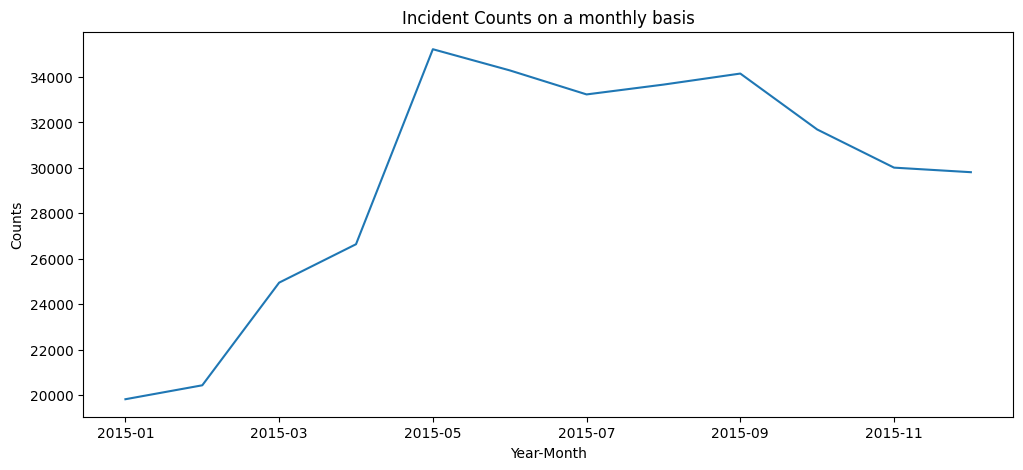

In [45]:
# plotting the month column
#dataset['Year-Month'].value_counts().plot()
monthly_incidents =  dataset.groupby('Year-Month').size().plot(figsize=(12,5),
                                                               title='Incident Counts on a monthly basis', ylabel='Counts')

- Are <b>January</b> and <b>Ferbruary</b> does not have any Complaints? Looks like nobody wants to go out in cold weather....😉
- We don't have any complaints from <b>January</b> and <b>Ferbruary</b> in our dataset because we might have eliminated them as <b>Null Values</b> earlier.

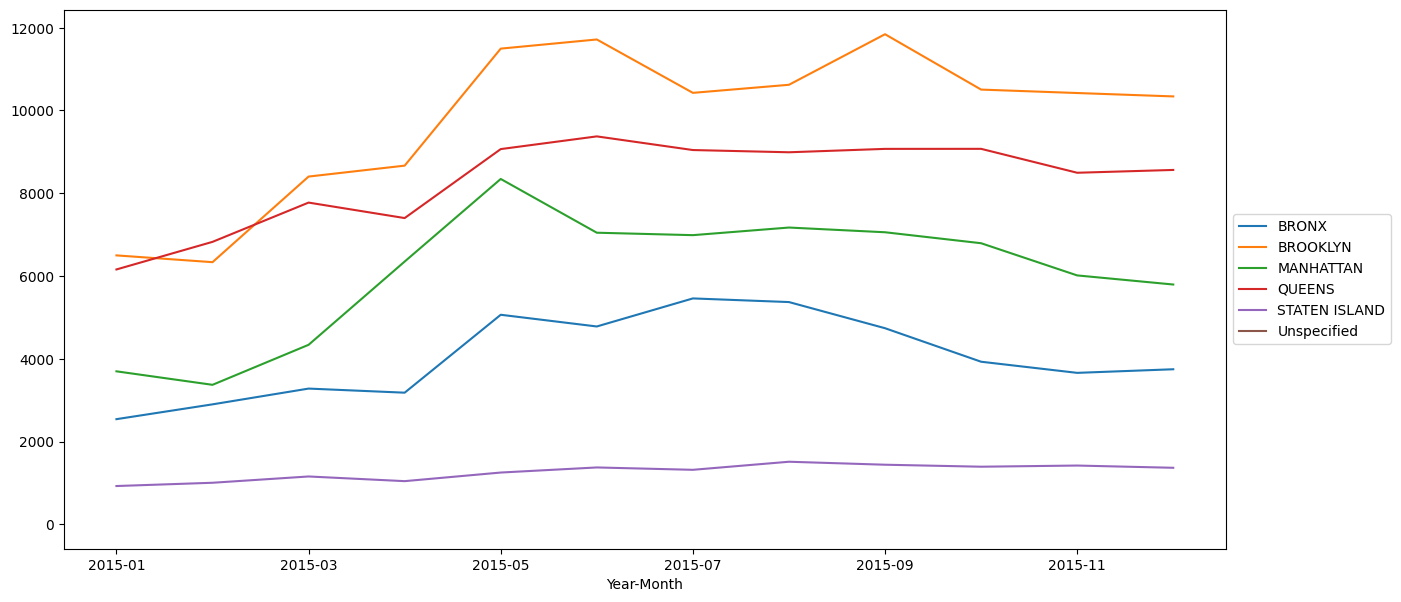

In [46]:
# plotting Borough on the basis of Year-Month
dataset.groupby(['Year-Month','Borough']).size().unstack().plot(figsize=(15,7))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

- <b>BROOKLYN</b> raised most cases all over and most of them were raised in <b>MAY-JUNE</b> and <b>SEPTEMBER</b>.

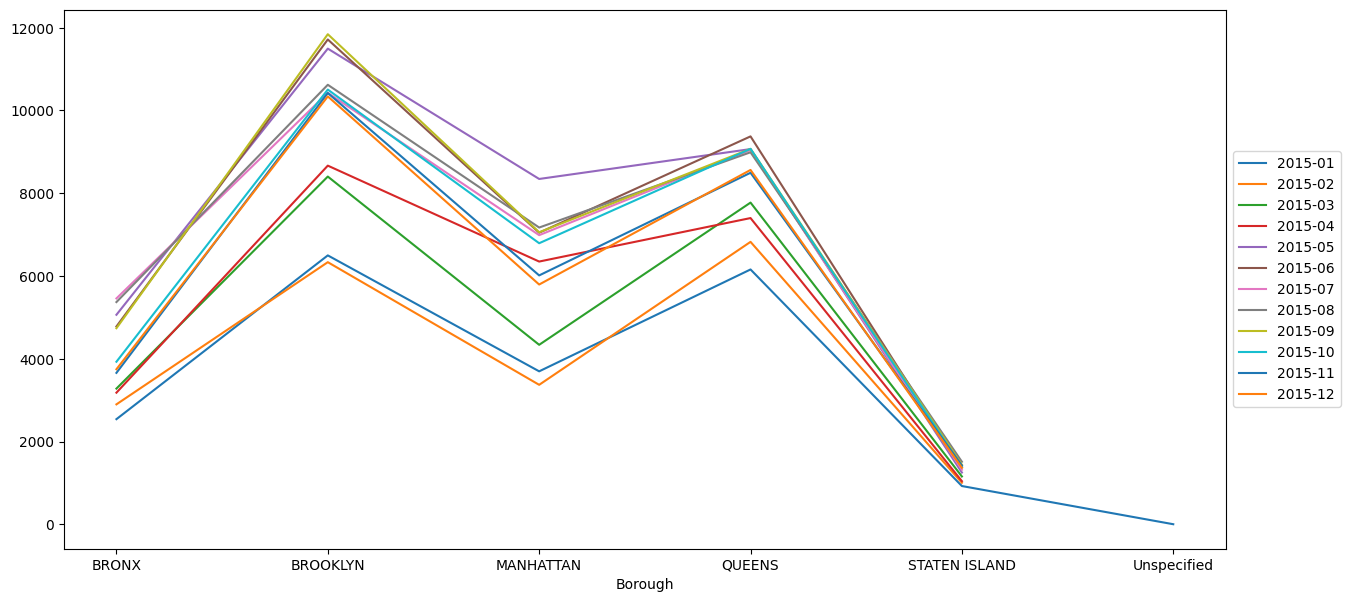

In [47]:
# Plotting Year-Month on the basis of Borough
dataset.groupby(['Borough', 'Year-Month']).size().unstack().plot(figsize=(15,7))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

- <b>DECEMBER</b> has raised least complaints.

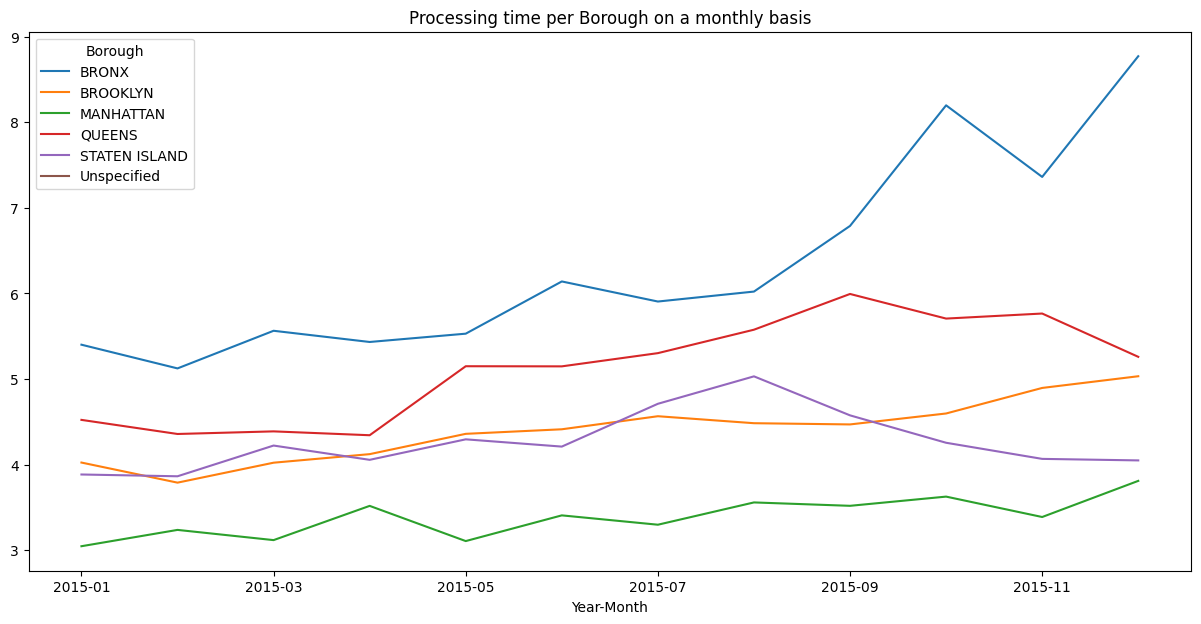

In [48]:
# Processing time per Borough on a monthly basis
dataset.groupby(['Year-Month','Borough'])['Request_Closing_Time_in_Hours'].mean().unstack().plot(figsize=(15,7),
                                                                        title='Processing time per Borough on a monthly basis');

- <b>BRONX</b> has the maximum Processing time every month even though it has the least complaints.


# 5. Perform a statistical test for the following:
### Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.


## a. Whether the average response time across complaint types is similar or not (overall)
## b. Are the type of complaint or service requested and location related?

In [49]:
# viewing the columns
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time', 'Request_Closing_Time_in_Hours',
       'Request_Closing_Time_in_Seconds', 'Year-Month'],
      dtype='object')

In [50]:
# lets see the average response time in seconds for different complaint types
avg_response_time = dataset.groupby(['Complaint Type']).Request_Closing_Time_in_Seconds.mean().sort_values(ascending=True)
avg_response_time

Complaint Type
Posting Advertisement        7287.171091
Noise - Commercial          11042.455562
Noise - House of Worship    11410.395656
Noise - Park                12196.250125
Noise - Street/Sidewalk     12219.275836
Traffic                     12324.517729
Disorderly Youth            12395.754777
Noise - Vehicle             12586.495921
Drinking                    13805.907791
Vending                     14355.265738
Illegal Parking             15582.870960
Blocked Driveway            16217.841222
Animal Abuse                18052.146476
Graffiti                    23276.343949
Derelict Vehicle            25281.668519
Name: Request_Closing_Time_in_Seconds, dtype: float64

- <b>Null Hypothesis</b> -->>  Average response time across complaint types is similar(overall).
- <b>Alternate Hypothesis</b> -->> Average response time across complaint types is not similar(overall).

-- We can say that for overall case our <b>NULL HYPOTHESIS</b> is rejected as the Average Response Time in Seconds for different complaint types is different

# Testing for our Hypothesis

- Below We conduct ANOVA (Analysis of Variance) test for top 5 type of complaints

- For a 95% of confidence interval we choose our alpha as 0.05 for 5%

- Alpha(0.05) is the critical p-value, if our calculated p-value is less than alpha, it will give us strong evidence to reject Null Hypothesis.
>
- <b>if p < alpha(0.05) <b>: Reject Null Hypothesis, Average response time for all the complaints type is not same.</b>

- <b>if p > alpha(0.05) : Fail to reject Null Hypothesis, Average response time for all the complaints type is same.</b>

In [51]:
# to calculate the p-value log of time taken to close the complaint per complaint is taken
data = {}
for complaint in dataset['Complaint Type'].unique():
    data[complaint] = np.log(dataset[dataset['Complaint Type']==complaint]['Request_Closing_Time_in_Seconds'])

In [52]:
data.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'])

In [53]:
for complaint in data.keys():
    print(data[complaint].std())

1.1034427280147538
0.9648261559192399
1.0738575188820065
1.245203115675723
1.0906086742381957
1.1726208122486383
1.2260912326229831
1.0794238937664058
1.036571596635843
1.114297657501911
1.1833906044565488
1.0489006100091247
1.1208177221382012
1.0093473489139961
1.034012824402592


In [54]:
# importing f_oneway from scipy.stats library
from scipy.stats import f_oneway
# taking top 5 complaints
stat, p = f_oneway(data['Blocked Driveway'], data['Illegal Parking'], data['Noise - Street/Sidewalk'],
                   data['Derelict Vehicle'], data['Noise - Commercial'])
print('Statistics= %.3f, p = %.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('We have Different distributions (reject H0)')

Statistics= 2811.335, p = 0.000
We have Different distributions (reject H0)


- <b>As our p-value is quite low , hence it is being converted to 0.0</b>

- Since our p-value is lower than our critical p-value, we will conclude that we have enough evidence to reject our Null Hypothesis and that is:

- Average response time for all the complaints type is not same.

### For relation between Complaint Type and Location
we will use Crosstab and Chi-square Test

In [55]:
# getting crosstab from pandas
city_type = pd.crosstab(dataset['City'], dataset['Complaint Type'])

In [56]:
# viewing first 5 entries of city_type
city_type.head()

Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Posting Advertisement,Traffic,Vending
City,,,,,,,,,,,,,,,
ARVERNE,46,50,32,2,1,1,62,2,14,2,29,9,0,1,1
ASTORIA,170,3436,426,5,43,4,1337,1640,21,64,408,236,3,60,57
Astoria,0,159,14,0,0,0,277,310,0,0,145,0,0,0,0
BAYSIDE,53,513,231,2,1,3,635,47,3,3,17,24,0,9,2
BELLEROSE,15,138,120,2,1,0,131,38,1,1,13,11,1,9,0


In [57]:
# Now we will do Chi-square Test

In [58]:
# contigency table
table = city_type 
# table -->> The contingency table. The table contains the observed frequencies (i.e. number of occurrences) in each category.
# stat -->> chi2 or Test Statistic
# p -->> The p-value of the Test
# dof -->> Degrees of Freedom
# expected -->> The expected frequencies, based on the marginal sums of the table.
stat, p, dof, expected = chi2_contingency(table)

In [59]:
print('The Degrees of Freedom are : {}'. format(dof))
print('The P-Value of the Testing is {}: '.format(p))
print('Expected values : \n')
print(expected)

The Degrees of Freedom are : 728
The P-Value of the Testing is 0.0: 
Expected values : 

[[7.47687847e+00 7.15323645e+01 1.52521200e+01 2.23594271e-01
  9.96205046e-01 1.11797135e-01 6.48402022e+01 3.10632257e+01
  7.54096600e-01 2.84406215e+00 3.61674414e+01 1.36164638e+01
  4.82792724e-01 3.67506379e+00 2.96369221e+00]
 [2.34690908e+02 2.24532144e+03 4.78747100e+02 7.01837571e+00
  3.12697695e+01 3.50918786e+00 2.03526190e+03 9.75040139e+02
  2.36702544e+01 8.92719510e+01 1.13525580e+03 4.27405670e+02
  1.51543272e+01 1.15356169e+02 9.30270055e+01]
 [2.68514882e+01 2.56892023e+02 5.47744786e+01 8.02987361e-01
  3.57764114e+00 4.01493680e-01 2.32858663e+02 1.11556426e+02
  2.70816438e+00 1.02137946e+01 1.29887041e+02 4.89003959e+01
  1.73383895e+00 1.31981458e+01 1.06434185e+01]
 [4.57810456e+01 4.37993803e+02 9.33889729e+01 1.36907127e+00
  6.09977931e+00 6.84535634e-01 3.97017587e+02 1.90200624e+02
  4.61734545e+00 1.74142377e+01 2.21453818e+02 8.33738241e+01
  2.95614751e+00 2.2502

In [60]:
# interpreting test statistics
prob = 0.95 # as aplha is considered 0.05
critical_value = chi2.ppf(prob, dof)
critical_value

791.8799091140163

In [61]:
print('Probability = {}, Critical Value = {}, Test statistic = {}'.format(prob, critical_value, stat))
print()
if abs(stat) >= critical_value:
    print('Dependent (Reject H0 or Null Hypothesis)')
else:
    print('Independent (Failed to reject Null Hypothesis)')


# interpreting the P-Value
alpha = 1 - prob
print('Significance : %.3f, P-Value : %.2f'%(alpha, p))
if p <= alpha:
    print('Dependent (Reject H0 or Null Hypothesis)')
else:
    print('Independent (Failed to reject Null Hypothesis)')

Probability = 0.95, Critical Value = 791.8799091140163, Test statistic = 125812.28625715601

Dependent (Reject H0 or Null Hypothesis)
Significance : 0.050, P-Value : 0.00
Dependent (Reject H0 or Null Hypothesis)


# --------------------------------------------------------------------------------------------------------------

# Thank You